In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils_auto 

# Configuration

In [3]:
trial_idx=0
paper='2004.04168'

# Code-generation prompts

In [5]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True))

In [6]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [7]:
generated_code = utils_auto.code_generate(prompt,max_tokens=12800,budget_tokens=6400,)


#################### THINKING ####################

Let's
Let's analyze this Hartree-Fock Hamiltonian step-by-step.

First, let's identify the components:

1. Kinetic (non-interacting) part: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. Hartree interaction: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock interaction: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

Also, there's a definition for $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Now, I need to answer the questions one by one:

**QUESTION 1: Dimension and Basis Order**

Let's identify the indices or flavors in the Hamiltonian:
- $s$, $s'$: These seem to be spin indices. Since there's no explicit mention of specific spin values, I'll assume we have two spins: up

In [9]:
print(generated_code['thinking'])

Let's analyze this Hartree-Fock Hamiltonian step-by-step.

First, let's identify the components:

1. Kinetic (non-interacting) part: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. Hartree interaction: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock interaction: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

Also, there's a definition for $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Now, I need to answer the questions one by one:

**QUESTION 1: Dimension and Basis Order**

Let's identify the indices or flavors in the Hamiltonian:
- $s$, $s'$: These seem to be spin indices. Since there's no explicit mention of specific spin values, I'll assume we have two spins: up ($\uparrow$) and down ($\downarrow$).

The creation operat

In [10]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: spin_up (↑), spin_down (↓)

2) EXP-VAL DEPENDENT TERMS: {
    "n_up(k) = <c_up^dagger(k) c_up(k)>": "exp_val[0, 0, k]",
    "n_down(k) = <c_down^dagger(k) c_down(k)>": "exp_val[1, 1, k]",
    "p_up_down(k) = <c_up^dagger(k) c_down(k)>": "exp_val[0, 1, k]",
    "p_down_up(k) = <c_down^dagger(k) c_up(k)>": "exp_val[1, 0, k]"
}

TERMS:
- E_s(k) c_s^dagger(k) c_s(k) for s=↑ -> H[0, 0, k], NI
- E_s(k) c_s^dagger(k) c_s(k) for s=↓ -> H[1, 1, k], NI
- U(0)/N * sum_k1 <c_up^dagger(k1) c_up(k1)> c_up^dagger(k2) c_up(k2) -> H[0, 0, k2], I
- U(0)/N * sum_k1 <c_up^dagger(k1) c_up(k1)> c_down^dagger(k2) c_down(k2) -> H[1, 1, k2], I
- U(0)/N * sum_k1 <c_down^dagger(k1) c_down(k1)> c_up^dagger(k2) c_up(k2) -> H[0, 0, k2], I
- U(0)/N * sum_k1 <c_down^dagger(k1) c_down(k1)> c_down^dagger(k2) c_down(k2) -> H[1, 1, k2], I
- -1/N * sum_k1 U(k1-k2) <c_up^dagger(k1) c_up(k1)> c_up^dagger(k2) c_up(k2) -> H[0, 0, k2], I
- -1/N * sum_k1 U(k

In [12]:
code = utils_auto.extract_code(generated_code['text'])

In [14]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin degrees of freedom.
    
    The Hamiltonian consists of:
    1. Kinetic term: E_s(k) = sum_n t_s(n) exp(-i k·n)
    2. Hartree term: U(0)/N sum_{s,s',k1,k2} <c_s^dagger(k1) c_s(k1)> c_s'^dagger(k2) c_s'(k2)
    3. Fock term: -1/N sum_{s,s',k1,k2} U(k1-k2) <c_s^dagger(k1) c_s'(k1)> c_s'^dagger(k2) c_s(k2)
    
    Args:
        N_shell: Number of shells for the k-space grid
        parameters: Dictionary containing model parameters
        filling_factor: Filling factor of the system (default: 0.5)
    """
    def __init__(self, N_shell: int=5, parameters: dict={'t_up': 1.0, 't_down': 1.0, 'U0': 1.0, 'Un': 0.5}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Tuple representing the flavor dimensions (spin up, spin down)
        self.basis_order = {'0': 'spin'}
        
        # Occupan

In [18]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_0.py


# Code evaluation

In [24]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [25]:
import importlib

In [26]:
module = importlib.import_module(code_path)

In [34]:
import HF

## Check k-space

In [27]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

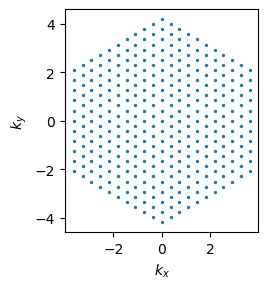

In [30]:
utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [31]:
h_nonint = ham.generate_non_interacting()

In [35]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

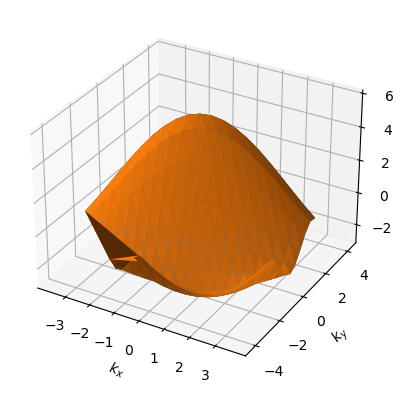

In [63]:
utils_auto.plot_2d_bandstructure(ham,en)

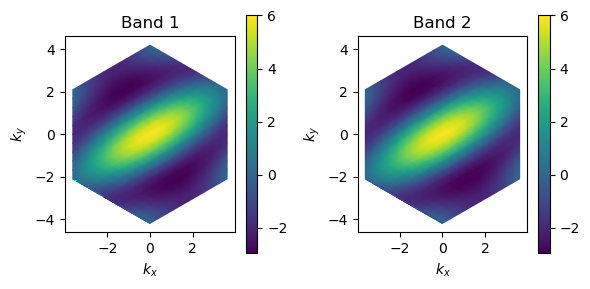

In [67]:
utils_auto.plot_2d_false_color_map(ham,en)

In [68]:
"""Interstingly, the quality of code is defpendent on the level of thinking, controlled by `budget_tokens`"""

'Interstingly, the quality of code is defpendent on the level of thinking, controlled by `budget_tokens`'

## Infinitesemial U limit

In [75]:
ham_int= module.HartreeFockHamiltonian(N_shell=10)
ham_int.U0=1e-5
ham_int.U1=0

In [76]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [77]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


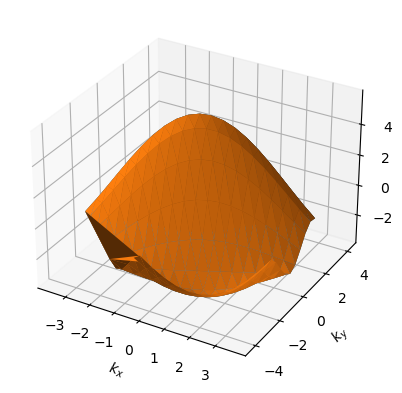

In [74]:
utils_auto.plot_2d_bandstructure(ham_int,en_int)

## Large U limit

In [78]:
ham_int= module.HartreeFockHamiltonian(N_shell=10)
ham_int.U0=1e5
ham_int.U1=0

In [79]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [80]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


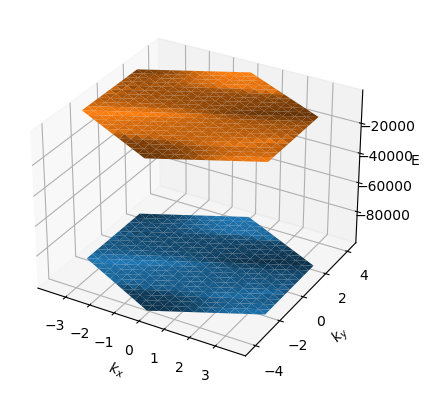

In [82]:
utils_auto.plot_2d_bandstructure(ham_int,en_int)

In [85]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 99386.76
U/T is 25434.14
mean_U is 24999.09
